# Week 4 project
## Changes in religious congregations in Maryland counties during the first decade of the 21st century

<IPython.core.display.Javascript object>


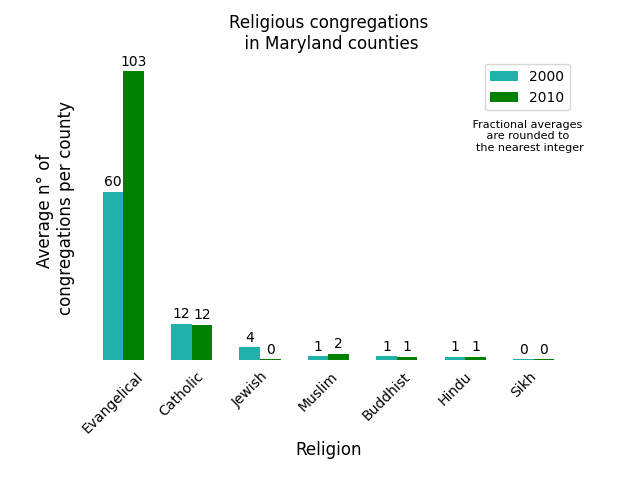

In [6]:
# Import libraries
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Import datasets
df2000 = pd.read_csv('religioncensus_county_2000.csv')
df2010 = pd.read_csv('religioncensus_county_2010.csv')

# Create dataframes from the datasets with Maryland data only
df2000md = df2000[df2000['STATE'].str.match('Maryland')]
df2010md = df2010[df2010['STNAME'].str.match('Maryland')]

# Correct some county name discrepancies in the 2000 dataframe and sort by county
df2000md.at[1193,'COUNTY']='Baltimore County'
df2000md.at[1214,'COUNTY']='Baltimore City'
df2000md.at[1208,'COUNTY']="St. Mary's"
df2000md = df2000md.sort_values(by=['COUNTY'])

# Correct some county name discrepancies in the 2010 dataframe and sort by county
df2010md.at[1220,'CNTYNAME']='Baltimore City'
df2010md = df2010md.sort_values(by=['CNTYNAME'])

# Create a tuple to be used as a common index for both dataframes and apply to the 2010 dataframe
cnties = tuple(df2000md['COUNTY'])
df2010md['CNTYNAME'] = cnties

# Index dataframes by county name
df2000md = df2000md.set_index(['COUNTY'])
df2010md = df2010md.set_index(['CNTYNAME'])

# Create two dataframes with data from major religions which have at least one congregation in Maryland
dfcombo2000 = pd.DataFrame({'2000 Evangelical': df2000md['EVANCG'],
                        '2000 Catholic': df2000md['CATHCG'],
                        '2000 Jewish': df2000md['JEWCG'],
                        '2000 Muslim': df2000md['ISLAMCG'],
                        '2000 Buddhist': df2000md['BUDDHCG'],
                        '2000 Hindu': df2000md['HINDUCG'],
                        '2000 Sikh': df2000md['SIKHSCG']}, index = cnties) 

dfcombo2010 = pd.DataFrame({'2010 Evangelical': df2010md['EVANCNG'],
                        '2010 Catholic': df2010md['CATHCNG'],
                        '2010 Jewish': df2010md['UMJCCNG'],
                        '2010 Muslim': df2010md['MSLMCNG'],
                        '2010 Buddhist': df2010md['BUDMCNG']+df2010md['BUDTCNG']+df2010md['BUDVCNG'],
                        '2010 Hindu': df2010md['HNICNG']+df2010md['HNPRCNG']+df2010md['HNRCNG']+df2010md['HNTTCNG'],
                        '2010 Sikh': df2010md['SIKHCNG']}, index = cnties)

# Fill NaN values with zeroes
dfcombo2000.fillna(0, inplace=True)
dfcombo2010.fillna(0, inplace=True)

# Calculate the county-level average data
avgdata2000 = []
for columname, columndata in dfcombo2000.iteritems():
    avg1 = np.mean(columndata.values)
    avgdata2000.append(avg1)
    
avgdata2010 = []
for columname, columndata in dfcombo2010.iteritems():
    avg2 = np.mean(columndata.values)
    avgdata2010.append(avg2)

# Prepare values & labels for the x axis
congs = ('Evangelical', 'Catholic', 'Jewish', 'Muslim', 'Buddhist', 'Hindu',  'Sikh')
xvals = range(len(congs))
newxvals = []
for item in xvals:
    newxvals.append(item+0.3)

# Code block for the figure
fig = plt.figure()
ax = fig.add_subplot(111)
bar1 = plt.bar(congs, avgdata2000, width = 0.3, color = 'lightseagreen')
bar2 = plt.bar(newxvals, avgdata2010, width = 0.3, color = 'green')
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
plt.xlabel('Religion', fontsize = 12)
#plt.xticks(congs)
plt.ylabel('Average n° of \ncongregations per county', fontsize = 12)
plt.title('Religious congregations\n in Maryland counties', fontsize = 12)
plt.legend(['2000', '2010'])
ax.xaxis.set_ticks_position('none')
plt.tick_params(axis='y', which='both', left=False, right=False)
plt.yticks([])
ax.text(5.2,75, ' Fractional averages \n     are rounded to \n  the nearest integer', fontsize = 8)
for bar in bar1:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, str(int(bar.get_height())), 
                 ha='center', color='black', fontsize=10)

for bar in bar2:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, str(int(bar.get_height())), 
                       ha='center', color='black', fontsize=10)
    
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.subplots_adjust(bottom=0.25)